In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

# keras의 데이터셋의 패션 MNIST 데이터를 학습용, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) =\
fashion_mnist.load_data()

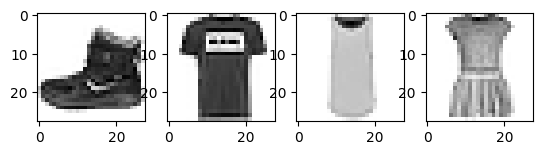

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys') # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1], cmap='Greys') # 두 번째 훈련용 데이터
ax3.imshow(train_images[2], cmap='Greys') # 세 번째 훈련용 데이터
ax4.imshow(train_images[3], cmap='Greys') # 네 번째 훈련용 데이터

In [3]:
print(train_labels[:4])

[9 0 0 3]


In [4]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

labels = train_labels[:4]
for i in labels:
    print('{} : {}'.format(i, mnist_lbl[i]))

9 : Ankle_boot
0 : T-shirt
0 : T-shirt
3 : Dress


Text(0, 0, 'Dress')

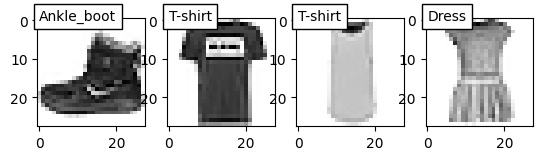

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys') # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1], cmap='Greys') # 두 번째 훈련용 데이터
ax3.imshow(train_images[2], cmap='Greys') # 세 번째 훈련용 데이터
ax4.imshow(train_images[3], cmap='Greys') # 네 번째 훈련용 데이터

ax1.text(0, 0, mnist_lbl[train_labels[0]], bbox={'facecolor': 'white'})
ax2.text(0, 0, mnist_lbl[train_labels[1]], bbox={'facecolor': 'white'})
ax3.text(0, 0, mnist_lbl[train_labels[2]], bbox={'facecolor': 'white'})
ax4.text(0, 0, mnist_lbl[train_labels[3]], bbox={'facecolor': 'white'})

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels,\
                                     verbose=2)
print('\n테스트 정확도:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4853 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3621 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3277 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3049 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2848 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2724 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2611 - accuracy: 0.9024
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2518 - accuracy: 0.9056
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2399 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - 

In [7]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]

In [8]:
model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (28, 28, 1),
                        kernel_size = (3,3), padding = 'same', 
                        filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', 
                        filters = 64),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', 
                        filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels,
                 epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 81s 57ms/step - loss: 0.4489 - accuracy: 0.8384 - val_loss: 0.3183 - val_accuracy: 0.8855
Epoch 2/5
1407/1407 [==============================] - 85s 61ms/step - loss: 0.2970 - accuracy: 0.8905 - val_loss: 0.2795 - val_accuracy: 0.8979
Epoch 3/5
1407/1407 [==============================] - 88s 63ms/step - loss: 0.2543 - accuracy: 0.9067 - val_loss: 0.2581 - val_accuracy: 0.9067
Epoch 4/5
1407/1407 [==============================] - 95s 67ms/step - loss: 0.2187 - accuracy: 0.9184 - val_loss: 0.2602 - val_accuracy: 0.9073
Epoch 5/5
1407/1407 [==============================] - 92s 65ms/step - loss: 0.1907 - accuracy: 0.9288 - val_loss: 0.2664 - val_accuracy: 0.9068


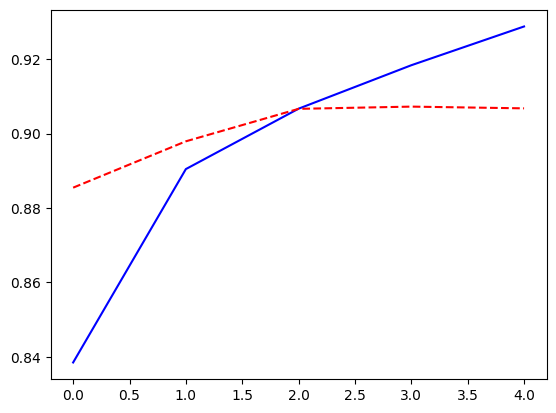

In [11]:
plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels,\
                                     verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 6s - loss: 0.2783 - accuracy: 0.9041 - 6s/epoch - 18ms/step
테스트 정확도: 0.9041000008583069


In [13]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

images = test_images[:25]
pred = np.argmax(model.predict(images), axis=1)
print('예측값 =', pred)
print('실제값 =', test_labels[:25])

1/1 [==============================] - 0s 139ms/step
예측값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 5 1]
실제값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]


313/313 [==============================] - 5s 15ms/step


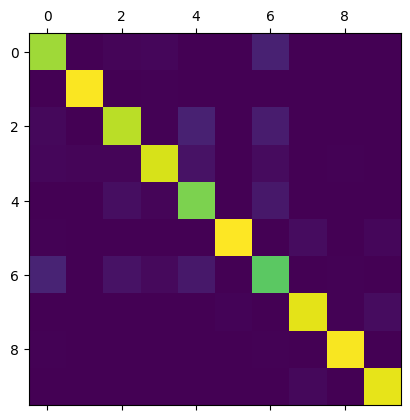

In [14]:
from sklearn.metrics import confusion_matrix

pred = np.argmax(model.predict(test_images), axis=1)
conf_mat = confusion_matrix(pred, test_labels)
plt.matshow(conf_mat)

In [15]:
print(conf_mat)

[[849   0  13  18   1   0  90   0   2   0]
 [  1 984   0   6   1   0   1   0   1   0]
 [ 20   1 884   7  92   0  75   0   2   0]
 [ 19  14  14 928  47   0  28   0   4   0]
 [  3   1  38  15 794   0  62   0   1   0]
 [  5   0   0   0   1 988   0  32   2  16]
 [ 97   0  48  24  62   0 738   0   5   0]
 [  1   0   0   0   0  10   0 948   5  32]
 [  5   0   3   2   2   0   6   0 977   1]
 [  0   0   0   0   0   2   0  20   1 951]]
